# Pre-Processing Techniques

## Imports

In [73]:
%reload_ext autoreload
%autoreload 2
import pandas as pd
from PreProcessingPy import pp

In [74]:
#TODO: Do analysis of Individual Files: Shapes, Class Distributions
#TODO: Deal with NULL values

## Read the Relevant Dataframes and Merge

In [75]:
# Read the dfs
files = ['Data/Plasma/BLENNOWPLASMATAU_07Feb2024.csv', 'Data/Plasma/ADNI_BLENNOWPLASMANFL_10_03_18_27Nov2023.csv', 'Data/Plasma/UPENNPLASMA_27Nov2023.csv']
fields_needed = ['RID', 'VISCODE', 'PLASMA_NFL', 'PLASMATAU', 'AB42', 'AB40']
preprocessor = pp(files, ['RID', 'VISCODE'], fields_needed)

# Create the AB42/AB40 value
preprocessor.create_ab4240(['AB42', 'AB40'])
preprocessor.df


,RID,VISCODE,PLASMA_NFL,PLASMATAU,AB4240
0,2,bl,28.2,2.41,0.331165
1,3,bl,188.3,3.84,0.220661
2,4,bl,31.2,3.76,0.311458
3,5,bl,36.3,3.81,0.189760
4,6,bl,52.5,2.86,0.153287
...,...,...,...,...,...
519,1402,bl,94.1,4.45,0.260446
520,1409,bl,46.4,3.54,0.231390
521,1414,bl,18.7,1.45,0.130205
522,1419,bl,25.8,1.56,0.194001


In [76]:
preprocessor.add_adni_merge_data()
preprocessor.df

d:\Git\NoMoreAlzheimersDisease\PreProcessingPy.py:25: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  am = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,CN,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,Dementia,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,CN,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,Dementia,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,Dementia,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Rename Fields

In [77]:
# Rename to be more intuitive for rest of detection
preprocessor.clean_data()
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,SCD,28.2,2.41,0.331165,28.0,16,74.3
1,3,bl,AD,188.3,3.84,0.220661,20.0,18,81.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,SCD,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
...,...,...,...,...,...,...,...,...,...
519,1402,bl,AD,94.1,4.45,0.260446,23.0,20,69.3
520,1409,bl,AD,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


## Plot the data

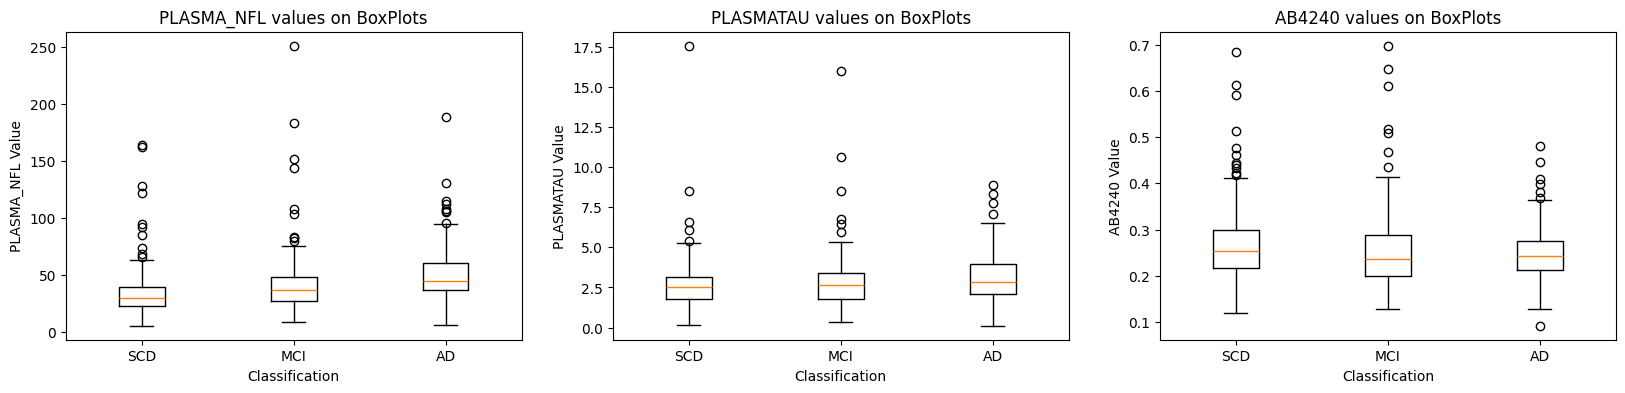

In [78]:
from PreProcessingPy import visual_display
vd = visual_display(preprocessor.df)

vd.display(['PLASMA_NFL', 'PLASMATAU', 'AB4240'])

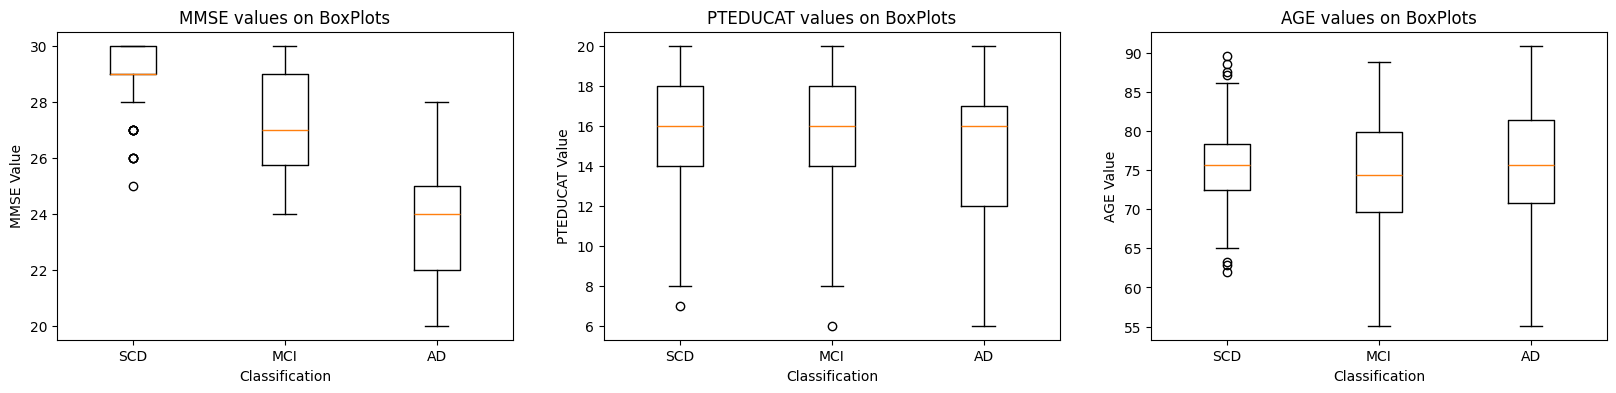

In [79]:
vd.display(['MMSE', 'PTEDUCAT', 'AGE'])

## Identify Outliers

In [84]:
# SOURCE :: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/#:~:text=Use%20Inter%2DQuartile%20Range%20(IQR,percentile%20of%20the%20dataset%2C%20respectively.

preprocessor.remove_outliers(['PLASMA_NFL', 'PLASMATAU', 'AB4240'])
preprocessor.df

,RID,VISCODE,DX,PLASMA_NFL,PLASMATAU,AB4240,MMSE,PTEDUCAT,AGE
0,2,bl,SCD,28.2,2.41,0.331165,28.0,16,74.3
2,4,bl,MCI,31.2,3.76,0.311458,27.0,10,67.5
3,5,bl,SCD,36.3,3.81,0.189760,29.0,16,73.7
4,6,bl,MCI,52.5,2.86,0.153287,25.0,13,80.4
7,10,bl,AD,37.9,2.74,0.234788,24.0,12,73.9
...,...,...,...,...,...,...,...,...,...
518,1398,bl,MCI,47.1,3.27,0.271073,24.0,16,77.6
520,1409,bl,AD,46.4,3.54,0.231390,21.0,15,65.9
521,1414,bl,MCI,18.7,1.45,0.130205,27.0,18,74.3
522,1419,bl,MCI,25.8,1.56,0.194001,28.0,17,77.9


### Plasma NFL

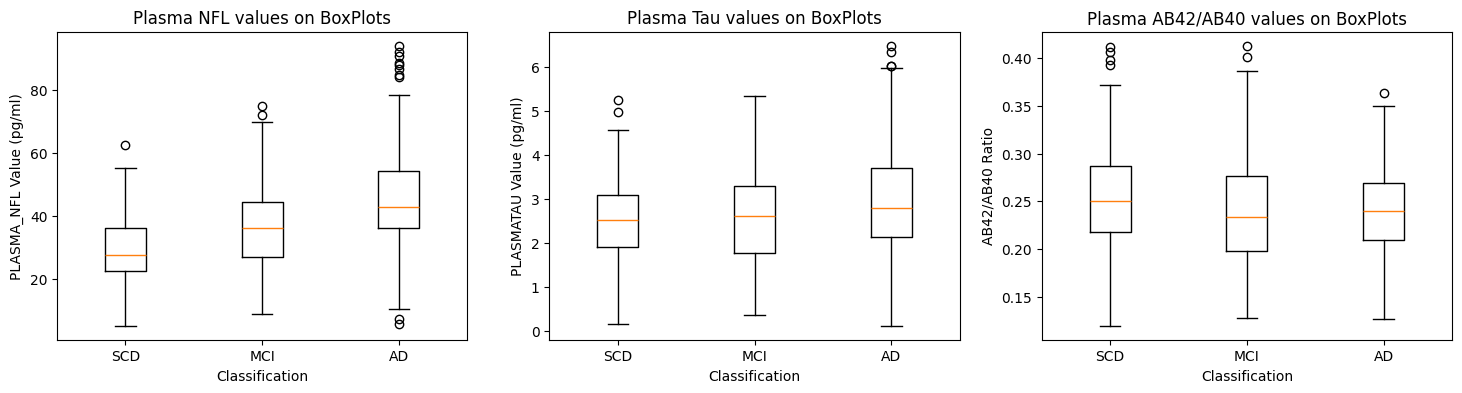

In [ ]:
SCD = df.loc[df["DX"] == "SCD"]
MCI = df.loc[df["DX"] == "MCI"]
AD = df.loc[df["DX"] == "AD"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

box_plot_nfl = [list(SCD['PLASMA_NFL'].dropna()), list(MCI['PLASMA_NFL']), list(AD['PLASMA_NFL'].dropna())]

axes[0].boxplot(box_plot_nfl, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[0].set_title('Plasma NFL values on BoxPlots')
axes[0].set_ylabel('PLASMA_NFL Value (pg/ml)')
axes[0].set_xlabel('Classification')

# Remove the null values also
box_plot_tau = [list(SCD['PLASMATAU'].dropna()), list(MCI['PLASMATAU']), list(AD['PLASMATAU'].dropna())]

axes[1].boxplot(box_plot_tau, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[1].set_title('Plasma Tau values on BoxPlots')
axes[1].set_ylabel('PLASMATAU Value (pg/ml)')
axes[1].set_xlabel('Classification')

box_plot_ab = [list(SCD['AB4240'].dropna()), list(MCI['AB4240'].dropna()), list(AD['AB4240'].dropna())]

axes[2].boxplot(box_plot_ab, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[2].set_title('Plasma AB42/AB40 values on BoxPlots')
axes[2].set_ylabel('AB42/AB40 Ratio')
axes[2].set_xlabel('Classification')
plt.show()

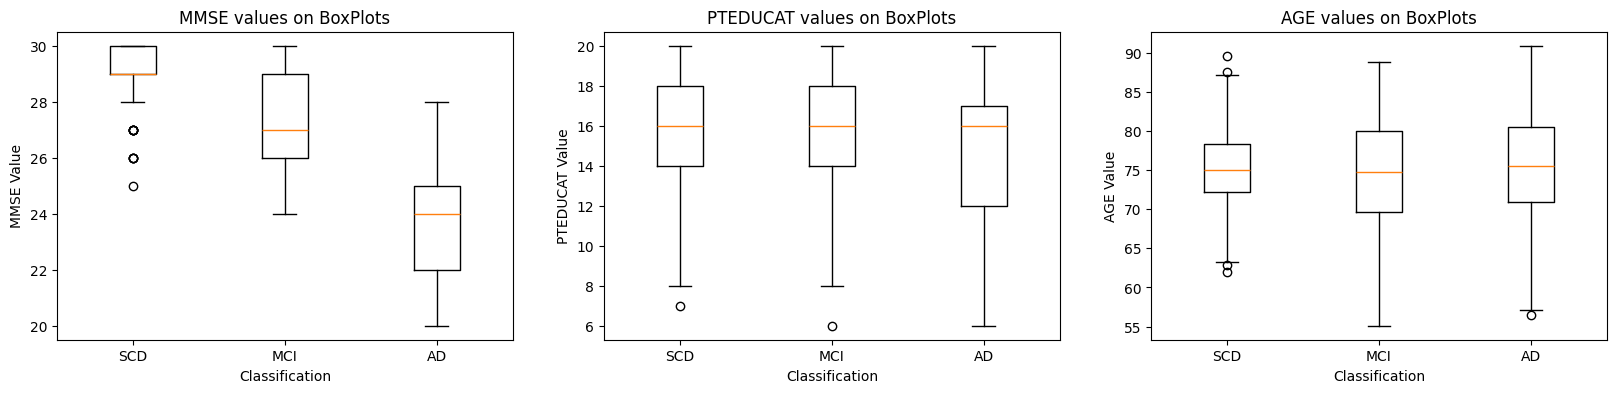

In [85]:
vd = visual_display(preprocessor.df)
vd.display(['PLASMA_NFL', 'PLASMATAU', 'AB4240'])

## A Second Attempt to Pre-Process

In [ ]:
# Try to Merge UGOT and BLEN First
blen = pd.read_csv("Data/Plasma/ADNI_BLENNOWPLASMANFLLONG_10_03_18_12Feb2024.csv")[['RID', 'VISCODE2', 'PLASMA_NFL']]
ugot = pd.read_csv("Data/Plasma/UGOTPTAU181_06_18_20_27Nov2023.csv")[['RID', 'VISCODE2', 'PLASMAPTAU181']]
upenn = pd.read_csv('Data/Plasma/UPENNMSMSABETA2_12Feb2024.csv').drop('VISCODE', axis=1)
# Merge the two together
data = pd.merge(blen, ugot, on=['RID', 'VISCODE2'], how='inner')
data = pd.merge(data, upenn, on=['RID', 'VISCODE2'], how='inner')

data['ABETA4240'] = data['ABETA42'] / data['ABETA40']
data = data.drop(['ABETA42', 'ABETA40'], axis=1)

# Now Combine the DX given vales
dx = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')
df = pd.merge(data.rename(columns={'VISCODE2':'VISCODE'}), dx, on=['RID', 'VISCODE'], how='inner')[['RID', 'VISCODE', 'DX', 'PLASMA_NFL', 'PLASMAPTAU181', 'ABETA4240', 'MMSE', 'PTEDUCAT', 'AGE']]
df = df.replace("CN", "SCD").replace("Dementia", "AD").dropna()

df

/var/folders/9h/tqk_65w50d95gtyf68q0hv880000gn/T/ipykernel_9895/2156972541.py:13: DtypeWarning: Columns (20,105) have mixed types. Specify dtype option on import or set low_memory=False.
  dx = pd.read_csv('Data/ADNIMERGE_15Jun2023.csv')


,RID,VISCODE,DX,PLASMA_NFL,PLASMAPTAU181,ABETA4240,MMSE,PTEDUCAT,AGE
0,31,m60,SCD,50.7,18.642,0.101372,30.0,18,77.7
1,31,m60,SCD,50.7,21.306,0.101372,30.0,18,77.7
2,31,m60,SCD,56.2,18.642,0.101372,30.0,18,77.7
3,31,m60,SCD,56.2,21.306,0.101372,30.0,18,77.7
4,31,m96,SCD,64.0,24.496,0.073391,30.0,18,77.7
...,...,...,...,...,...,...,...,...,...
1176,5289,bl,SCD,21.5,8.672,0.195596,29.0,16,59.7
1177,5290,bl,SCD,42.4,18.583,0.076744,29.0,12,67.0
1178,5292,bl,SCD,42.6,17.408,0.102321,30.0,13,74.3
1179,5295,bl,SCD,16.4,10.932,0.144890,29.0,15,75.5


## Visualise the Data

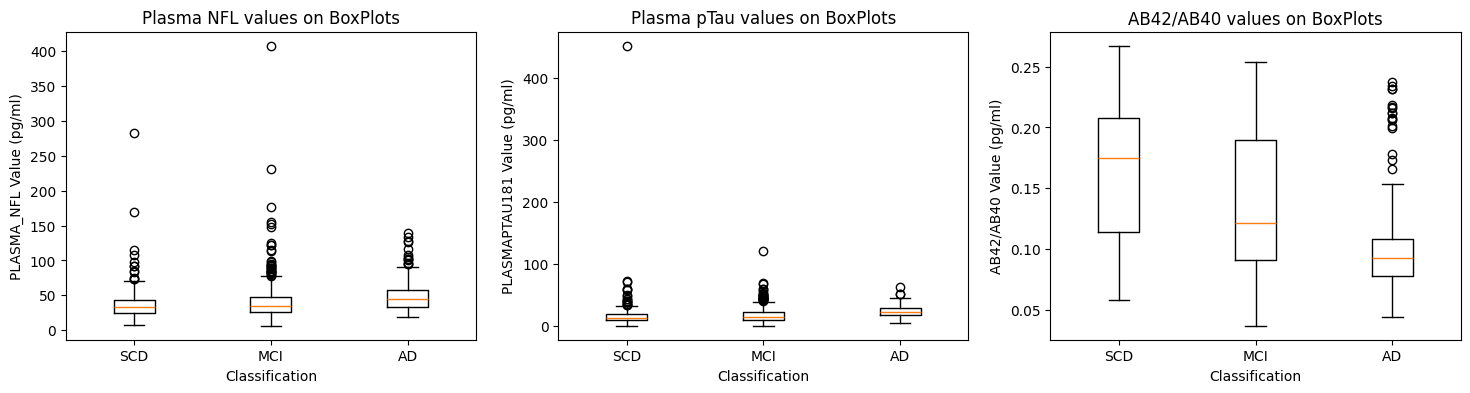

In [ ]:
SCD = df.loc[df["DX"] == "SCD"]
MCI = df.loc[df["DX"] == "MCI"]
AD = df.loc[df["DX"] == "AD"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

box_plot_nfl = [list(SCD['PLASMA_NFL'].dropna()), list(MCI['PLASMA_NFL']), list(AD['PLASMA_NFL'].dropna())]

axes[0].boxplot(box_plot_nfl, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[0].set_title('Plasma NFL values on BoxPlots')
axes[0].set_ylabel('PLASMA_NFL Value (pg/ml)')
axes[0].set_xlabel('Classification')

# Remove the null values also
box_plot_tau = [list(SCD['PLASMAPTAU181'].dropna()), list(MCI['PLASMAPTAU181']), list(AD['PLASMAPTAU181'].dropna())]

axes[1].boxplot(box_plot_tau, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[1].set_title('Plasma pTau values on BoxPlots')
axes[1].set_ylabel('PLASMAPTAU181 Value (pg/ml)')
axes[1].set_xlabel('Classification')

# Remove the null values also
box_plot_ab = [list(SCD['ABETA4240'].dropna()), list(MCI['ABETA4240']), list(AD['ABETA4240'].dropna())]

axes[2].boxplot(box_plot_ab, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[2].set_title('AB42/AB40 values on BoxPlots')
axes[2].set_ylabel('AB42/AB40 Value (pg/ml)')
axes[2].set_xlabel('Classification')


plt.show()

## Remove the Outliers

In [ ]:
# Get all the indexes that are not in the correct Range
indexes = get_outliers(SCD, "PLASMA_NFL") + get_outliers(MCI, "PLASMA_NFL") + get_outliers(AD, "PLASMA_NFL")
indexes = indexes + get_outliers(SCD, "PLASMAPTAU181") + get_outliers(MCI, "PLASMAPTAU181") + get_outliers(AD, "PLASMAPTAU181")
indexes = indexes + get_outliers(SCD, "ABETA4240") + get_outliers(MCI, "ABETA4240") + get_outliers(AD, "ABETA4240")
# Now remove all these indexes
df = df[~df['RID'].isin(indexes)]
print("Records Removed: ", len(indexes))
df

Records Removed:  121


,RID,VISCODE,DX,PLASMA_NFL,PLASMAPTAU181,ABETA4240,MMSE,PTEDUCAT,AGE
0,31,m60,SCD,50.7,18.642,0.101372,30.0,18,77.7
1,31,m60,SCD,50.7,21.306,0.101372,30.0,18,77.7
2,31,m60,SCD,56.2,18.642,0.101372,30.0,18,77.7
3,31,m60,SCD,56.2,21.306,0.101372,30.0,18,77.7
4,31,m96,SCD,64.0,24.496,0.073391,30.0,18,77.7
...,...,...,...,...,...,...,...,...,...
1176,5289,bl,SCD,21.5,8.672,0.195596,29.0,16,59.7
1177,5290,bl,SCD,42.4,18.583,0.076744,29.0,12,67.0
1178,5292,bl,SCD,42.6,17.408,0.102321,30.0,13,74.3
1179,5295,bl,SCD,16.4,10.932,0.144890,29.0,15,75.5


## Visualise the Cleaned Data

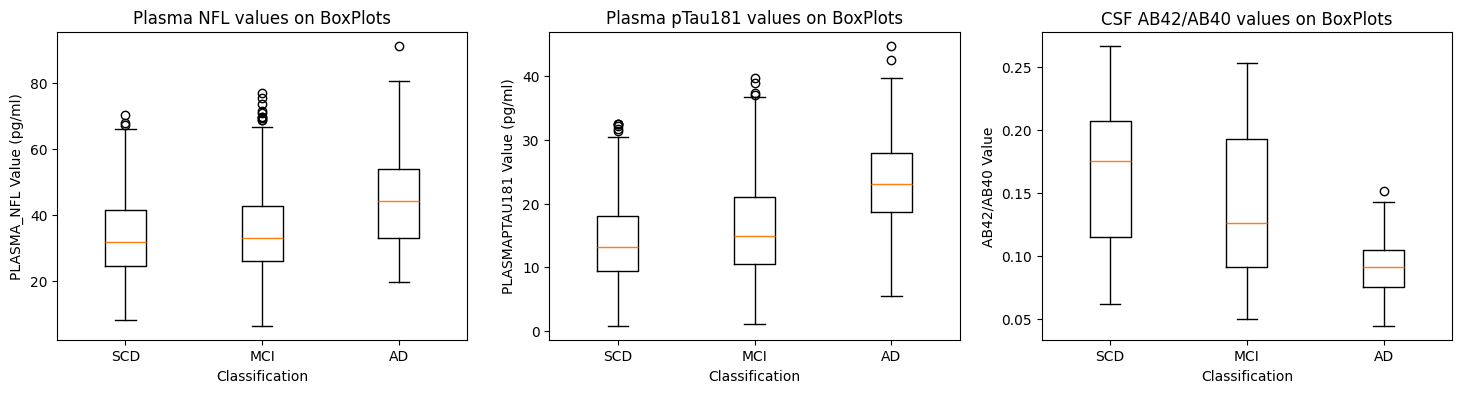

In [ ]:
SCD = df.loc[df["DX"] == "SCD"]
MCI = df.loc[df["DX"] == "MCI"]
AD = df.loc[df["DX"] == "AD"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

box_plot_nfl = [list(SCD['PLASMA_NFL'].dropna()), list(MCI['PLASMA_NFL']), list(AD['PLASMA_NFL'].dropna())]

axes[0].boxplot(box_plot_nfl, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[0].set_title('Plasma NFL values on BoxPlots')
axes[0].set_ylabel('PLASMA_NFL Value (pg/ml)')
axes[0].set_xlabel('Classification')

# Remove the null values also
box_plot_tau = [list(SCD['PLASMAPTAU181'].dropna()), list(MCI['PLASMAPTAU181']), list(AD['PLASMAPTAU181'].dropna())]

axes[1].boxplot(box_plot_tau, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[1].set_title('Plasma pTau181 values on BoxPlots')
axes[1].set_ylabel('PLASMAPTAU181 Value (pg/ml)')
axes[1].set_xlabel('Classification')

box_plot_ab = [list(SCD['ABETA4240'].dropna()), list(MCI['ABETA4240']), list(AD['ABETA4240'].dropna())]

axes[2].boxplot(box_plot_ab, showfliers=True, labels=['SCD', 'MCI', 'AD'])
axes[2].set_title('CSF AB42/AB40 values on BoxPlots')
axes[2].set_ylabel('AB42/AB40 Value')
axes[2].set_xlabel('Classification')
plt.show()

In [ ]:
df.to_csv("Data/ProcessedData/FilteredData2.csv", index=False)